0  th Iteration, testing error= 0.06399999999999995
755  unlable data add into lable data set
1  th Iteration, testing error= 0.06133333333333335
95  unlable data add into lable data set
2  th Iteration, testing error= 0.06266666666666665
20  unlable data add into lable data set
3  th Iteration, testing error= 0.058666666666666645
5  unlable data add into lable data set
4  th Iteration, testing error= 0.05466666666666664
0  unlable data add into lable data set
5  th  Iteration,final testing error= 0.05466666666666664
no any unlable data adding to the label dataset  lable size= 975


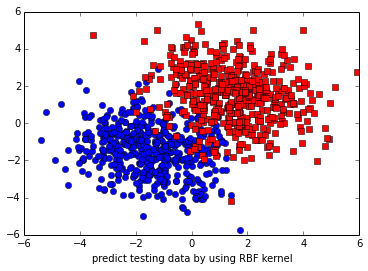

In [175]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import copy
#generate 2D train data
N_train=500
mean1= [-1.5, -1.5]
cov1= [[2, -0.5], [-0.5, 2]]  # diagonal covariance
x1, y1 = np.random.multivariate_normal(mean1, cov1, N_train).T
mean2 = [1.5, 1.5]
cov2 = [[2, -0.5], [-0.5, 2]]
x2, y2 = np.random.multivariate_normal(mean2, cov2, N_train).T

#conver two classfiy data into standard matrial train data
x_train = np.row_stack(((np.column_stack((x1, y1))),(np.column_stack((x2, y2)))))
y_train = (np.row_stack(((np.zeros((N_train,1))),(np.ones((N_train,1)))))).ravel()

#plot results
plt.figure()
plt.plot(x_train[np.where(y_train==0)[0], 0], x_train[np.where(y_train==0)[0], 1], 'o')
plt.plot(x_train[np.where(y_train==1)[0], 0], x_train[np.where(y_train==1)[0], 1], 's', c = 'r')
plt.xlabel('predict testing data by using RBF kernel')
#implement self-training, generate ladble and unlabe data
x_lable,x_unlable,y_lable,y_unlable=train_test_split(x_train,y_train,train_size=0.1,random_state=42);
x_train1,x_test,y_train1,y_test=train_test_split(x_train,y_train,train_size=0.25,random_state=42);
threshold=0.9

#Using SVM-RBF kernel to fit the lable data
svc=svm.SVC(kernel='rbf',probability=True)
#from experiment, find rbf kernel have better performance comparing with poly and linear kernel
#svc = svm.SVC(kernel='linear',probability=True)


iteration=0
while len(x_unlable)>0:
    svc.fit(x_lable,y_lable)
    test_error=1-svc.score(x_test,y_test)
    print  iteration," th Iteration, testing error=",test_error
    add_count=0
    del_index=[]
    #find high confidence point
    for i in range (len(x_unlable)):
        if max(max(svc.predict_proba(x_unlable[i].reshape(1,-1)))) > threshold:
            #add data to lable dataset
            x_lable=np.append(x_lable,[x_unlable[i]],axis=0)
            y_lable=np.append(y_lable,svc.predict([x_unlable[i]]),axis=0)
            del_index.append(i)
            add_count+=1
        #delete label data from unlable dataset
    x_unlable=np.delete(x_unlable,del_index,axis=0)
    y_unlable=np.delete(y_unlable,del_index,axis=0)
    print add_count," unlable data add into lable data set"
    iteration+=1
    if add_count==0:
        svc.fit(x_lable,y_lable)
        test_error=1-svc.score(x_test,y_test)
        print  iteration," th  Iteration,final testing error=",test_error
        print "no any unlable data adding to the label dataset  lable size=",len(x_lable)
        break
